## Replicating Vision Transformer on FoodVision-Mini

This notebook implements the following:

- Implements the Vision Transformer (ViT) from scratch in Python  
- Trains the ViT on the FoodVision-Mini dataset  
- Applies transfer learning to fine-tune the ViT on FoodVision-Mini  
- Fine-tunes an EfficientNet-B2 model on the same dataset  
- Compares the performance of the two models


### 1. Setup

In [10]:
import torch
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt

from src.data.dataloader import create_dataloader
from src.data.transforms import get_basic_transforms, get_imagenet_transforms
from src.utils import set_seed, dataset_summary, display_random_images, accuracy_fn, plot_loss_curves
from src.train import train
from src.models.vit import ViT, create_ViT_model
from src.models.efficientb2 import create_effnet_b2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Setting seed for deterministic behaviour
set_seed(42)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

### Data loading and Exploration

In [12]:
# Setup training and validation directory 

PROJECT_ROOT = Path(".").resolve().parent
DATA_DIR = PROJECT_ROOT / "data" / "food-101-tiny"

train_dir = DATA_DIR / "train"
val_dir = DATA_DIR / "valid"

In [4]:
dataset_summary(train_dir)

DATASET SUMMARY
----------------------------
Number of classes : 10
Total train images : 1500

Images per class:
  apple_pie       -> 150
  bibimbap        -> 150
  cannoli         -> 150
  edamame         -> 150
  falafel         -> 150
  french_toast    -> 150
  ice_cream       -> 150
  ramen           -> 150
  sushi           -> 150
  tiramisu        -> 150
----------------------------


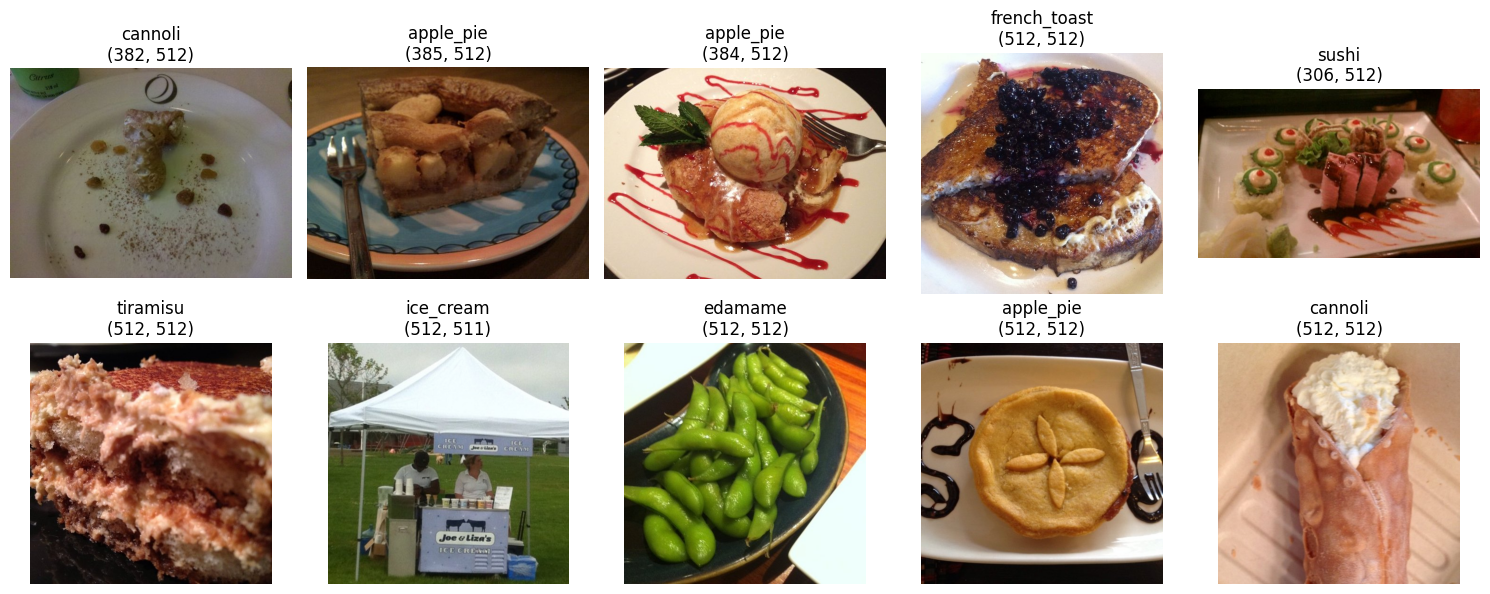

In [5]:
display_random_images(train_dir)

### Setting up dataloaders

### Vision Transformer (ViT) Model Setup

In [ ]:
vit_from_scratch = ViT().to(device)

### Raw Training

In [ ]:
BATCH_SIZE = 4 ### Memory constraints
EPOCHS = 8
train_tf, val_tf = get_basic_transforms()

dataloaders = create_dataloader(train_dir,
                                train_tf,
                                val_tf,
                                val_dir,
                                test_dir=None,
                                batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(vit_from_scratch.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
accuracy_fn = accuracy_fn


vit_training_from_scratch_results = train(vit_from_scratch,
                             dataloaders.train,
                             dataloaders.val,
                             optimizer,
                             loss_fn,
                              accuracy_fn,
                             device,
                             EPOCHS,
                             model_name="ViT_from_scratch"
                             )

### Transfer Learning --- ViT

In [ ]:
vit_transfer_learning = create_ViT_model()

In [ ]:
BATCH_SIZE = 32
EPOCHS = 8
train_tf, val_tf = get_imagenet_transforms()

dataloaders = create_dataloader(train_dir,
                                train_tf,
                                val_tf,
                                val_dir,
                                test_dir=None,
                                batch_size=BATCH_SIZE)

optimizer = torch.optim.Adam(vit_transfer_learning.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
accuracy_fn = accuracy_fn

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=EPOCHS,
    eta_min=1e-5
)

vit_transfer_learning_training_results = train(vit_transfer_learning,
                             dataloaders.train,
                             dataloaders.val,
                             optimizer,
                             loss_fn,
                             accuracy_fn,
                             device,
                             EPOCHS,
                             model_name="ViT_transfer_learning",
                             scheduler=scheduler
                             )

### EfficientNet-B2 Transfer Learning

In [13]:
efficient_b2_model = create_effnet_b2()

EfficientNetB2 transfer learning model initialised


In [14]:
BATCH_SIZE = 32
EPOCHS = 15

train_tf, val_tf = get_imagenet_transforms()

dataloaders = create_dataloader(train_dir,
                                train_tf,
                                val_tf,
                                val_dir,
                                test_dir=None,
                                batch_size=BATCH_SIZE)



optimizer = torch.optim.Adam(efficient_b2_model.parameters(), lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
accuracy_fn = accuracy_fn


scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=EPOCHS,
    eta_min=1e-5
)

efficientb2_transfer_learning_training_results = train(efficient_b2_model,
                             dataloaders.train,
                             dataloaders.val,
                             optimizer,
                             loss_fn,
                             accuracy_fn,
                             device,
                             EPOCHS,
                             model_name="efficientb2_transfer_learning",
                             scheduler=scheduler,
                             resume=True
                             )

Starting fresh training run for: efficientb2_transfer_learning


Epoch [1/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.9519 | Val Loss: 1.5716 | Train Acc: 39.42% | Val Acc: 69.02%
>>> Best model updated



Epoch [2/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.3951 | Val Loss: 1.2364 | Train Acc: 67.41% | Val Acc: 74.84%
>>> Best model updated



Epoch [3/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.1532 | Val Loss: 1.0604 | Train Acc: 72.01% | Val Acc: 77.62%
>>> Best model updated



Epoch [4/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 1.0194 | Val Loss: 0.9511 | Train Acc: 72.44% | Val Acc: 79.41%
>>> Best model updated



Epoch [5/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.9274 | Val Loss: 0.8779 | Train Acc: 75.39% | Val Acc: 78.63%
>>> Best model updated



Epoch [6/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.8756 | Val Loss: 0.8313 | Train Acc: 75.89% | Val Acc: 79.02%
>>> Best model updated



Epoch [7/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.8042 | Val Loss: 0.7979 | Train Acc: 77.60% | Val Acc: 80.20%
>>> Best model updated



Epoch [8/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.7745 | Val Loss: 0.7836 | Train Acc: 79.06% | Val Acc: 80.98%
>>> Best model updated



Epoch [9/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.7301 | Val Loss: 0.7431 | Train Acc: 79.18% | Val Acc: 81.17%
>>> Best model updated



Epoch [10/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6973 | Val Loss: 0.7309 | Train Acc: 79.65% | Val Acc: 81.09%
>>> Best model updated



Epoch [11/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6848 | Val Loss: 0.7082 | Train Acc: 78.99% | Val Acc: 80.59%
>>> Best model updated



Epoch [12/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6860 | Val Loss: 0.7030 | Train Acc: 79.76% | Val Acc: 80.31%
>>> Best model updated



Epoch [13/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6504 | Val Loss: 0.6870 | Train Acc: 80.89% | Val Acc: 80.98%
>>> Best model updated



Epoch [14/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6368 | Val Loss: 0.6677 | Train Acc: 81.47% | Val Acc: 81.76%
>>> Best model updated



Epoch [15/15]:   0%|          | 0/47 [00:00<?, ?it/s]

Train Loss: 0.6451 | Val Loss: 0.6769 | Train Acc: 80.08% | Val Acc: 80.98%

Training complete! Full checkpoint saved to /home/dhiran/my_projects/vision-transformer-pytorch-replication/experiments/efficientb2_transfer_learning/checkpoints/last.pth


### Results Comparison

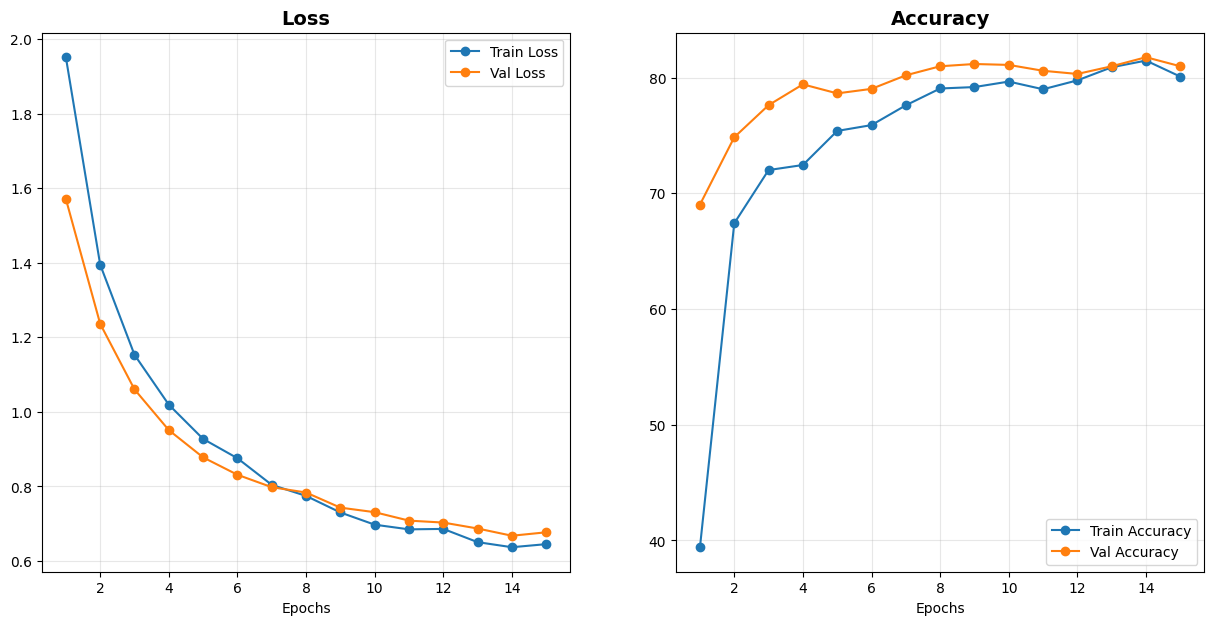

In [9]:
plot_loss_curves(efficientb2_transfer_learning_training_results)

### Key Learning